In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# Coupled first order ODEs

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$
$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$

Letting $S=(y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$ and $x$. This is like before, but in vector format

$$ \vec{S} = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} \hspace{10mm} \implies  \hspace{10mm} \frac{d\vec{S}}{dx} = \vec{f}(x, \vec{S}) = \vec{f}(x, y_1, y_2) =  \begin{bmatrix} y_1' \\ y_2' \end{bmatrix}  = \begin{bmatrix}  y_1 + y_2^2 + 3x\\ 3y_1 + y_2^3 - \cos(x) \end{bmatrix}$$

In [43]:
def dSdx(x, S):
    m1,m2,m3,p1,p2,p3=S
    p = [1,1.75,5,5]
    return [-m1 + p[3]/(1+p3**p[1])  + p[0],
           -m2 + p[3]/(1+p1**p[1])  + p[0],
           -m3 + p[3]/(1+p2**p[1])  + p[0],
            p[2]*(m1-p1),
            p[2]*(m2-p2),
            p[2]*(m3-p3)]
m1_0 = 0
m2_0 = 1
m3_0 = 0
p1_0 = 2
p2_0 = 0
p3_0 = 3
S_0 = (m1_0, m2_0, m3_0, p1_0, p2_0,p3_0)

In [44]:
x = np.linspace(0, 15, 2000)
sol = odeint(dSdx, y0=S_0, t=x, tfirst=True)

In [45]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]
y3_sol = sol.T[2]
y4_sol = sol.T[3]
y5_sol = sol.T[4]
y6_sol = sol.T[5]

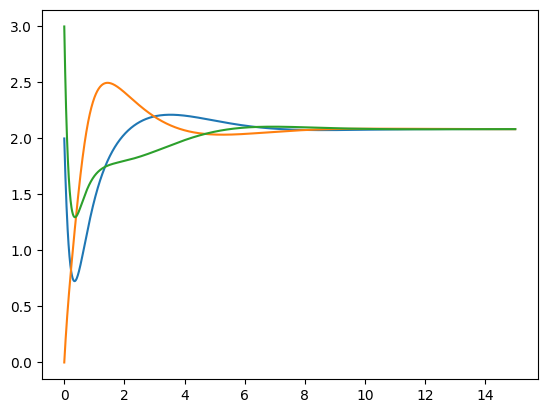

In [46]:
#plt.plot(x, y1_sol)
#plt.plot(x, y2_sol)
#plt.plot(x, y3_sol)
plt.plot(x, y4_sol)
plt.plot(x, y5_sol)
plt.plot(x, y6_sol)

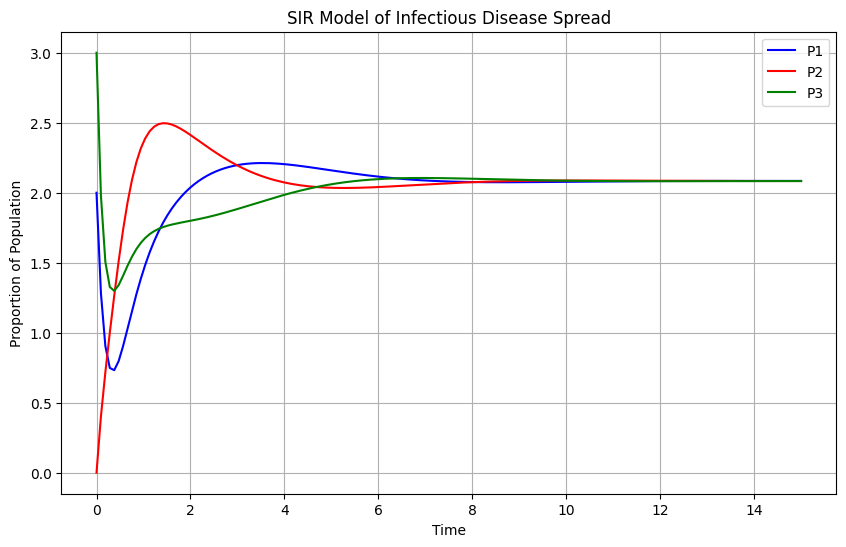

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 定义常微分方程组
def deriv(y, t, p):
    S1, S2, S3, P1, P2, P3 = y
    dS1dt = -S1 + p[3] / (1 + P3 ** p[1]) + p[0]
    dS2dt = -S2 + p[3] / (1 + P1 ** p[1]) + p[0]
    dS3dt = -S3 + p[3] / (1 + P2 ** p[1]) + p[0]
    dP1dt = p[3] * (S1 - P1)
    dP2dt = p[3] * (S2 - P2)
    dP3dt = p[3] * (S3 - P3)

    return dS1dt, dS2dt, dS3dt, dP1dt, dP2dt, dP3dt

# 初始条件
S10 = 0
S20 = 1
S30 = 0
P10 = 2
P20 = 0
P30 = 3
y0 = S10, S20, S30, P10, P20, P30

# 时间点
t = np.linspace(0, 15, 160)

# 定义参数
params = (1, 1.75, 5, 5)

# 解常微分方程
solution = odeint(deriv, y0, t, args=(params,))
P1, P2, P3 = solution.T[3], solution.T[4], solution.T[5]

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(t, P1, label='P1', color='blue')
plt.plot(t, P2, label='P2', color='red')
plt.plot(t, P3, label='P3', color='green')
plt.title('SIR Model of Infectious Disease Spread')
plt.xlabel('Time')
plt.ylabel('Proportion of Population')
plt.legend()
plt.grid()
plt.show()

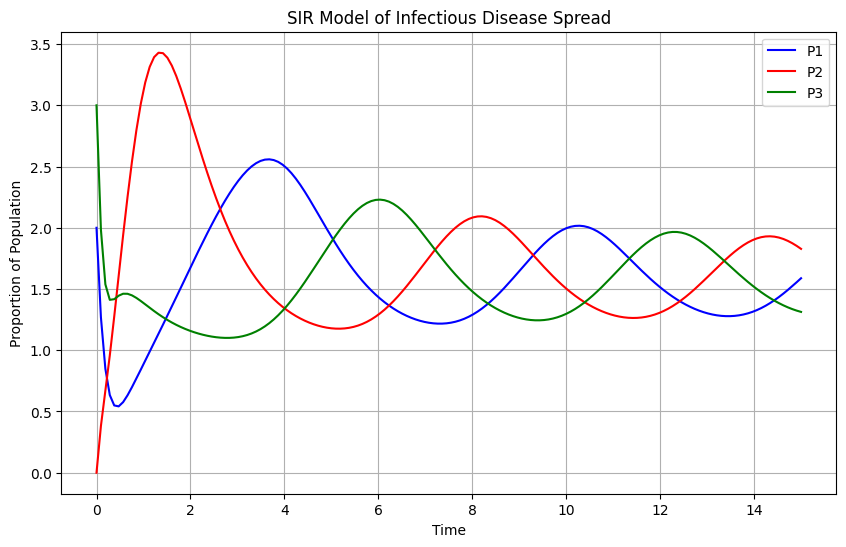

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 定义常微分方程组
def deriv(y, t, p):
    S1, S2, S3, P1, P2, P3 = y
    dS1dt = -S1 + p[3] / (1 + P3 ** p[2]) + p[0]
    dS2dt = -S2 + p[3] / (1 + P1 ** p[2]) + p[0]
    dS3dt = -S3 + p[3] / (1 + P2 ** p[2]) + p[0]
    dP1dt = p[2] * (S1 - P1)
    dP2dt = p[2] * (S2 - P2)
    dP3dt = p[2] * (S3 - P3)

    return dS1dt, dS2dt, dS3dt, dP1dt, dP2dt, dP3dt

# 初始条件
S10 = 0
S20 = 1
S30 = 0
P10 = 2
P20 = 0
P30 = 3
y0 = S10, S20, S30, P10, P20, P30

# 时间点
t = np.linspace(0, 15, 160)

# 定义参数
params = (1, 1.75, 5, 5)

# 解常微分方程
solution = odeint(deriv, y0, t, args=(params,))
P1, P2, P3 = solution[:, 3], solution[:, 4], solution[:, 5]

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(t, P1, label='P1', color='blue')
plt.plot(t, P2, label='P2', color='red')
plt.plot(t, P3, label='P3', color='green')
plt.title('SIR Model of Infectious Disease Spread')
plt.xlabel('Time')
plt.ylabel('Proportion of Population')
plt.legend()
plt.grid()
plt.show()